In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("linkedin_data_center_jobs.csv")
df.head()

,job_title,company_name,Salary ($),job_description,num_applicants,job_url,Seniority level,Employment type,Job function,Industries,workplace_type,State,publish_date
0,Imaging Student Intern PRN,Alaska Regional Hospital,NaN,DescriptionIntroductionDo you have the PRN car...,NaN,https://www.linkedin.com/jobs/view/4239122420/...,Internship,Part-time,Health Care Provider,Hospitals and Health Care,On-site,AK,10/04/25
1,DOD SkillBridge Internship – Field Technician,Siemens,NaN,"Here at Siemens, we take pride in enabling sus...",NaN,https://www.linkedin.com/jobs/view/4269469231/...,Mid-Senior level,Full-time,Other,Automation Machinery Manufacturing,Unknown,AK,09/23/25
2,Geotechnical Engineering Intern - Summer 2026,WSP in the U.S.,NaN,Job DescriptionThis OpportunityWSP USA hosts h...,NaN,https://www.linkedin.com/jobs/view/4286958078/...,Internship,Internship,Engineering and Information Technology,Professional Services,On-site,AK,09/30/25
3,"Field Engineer Intern - Northwest District, He...",Kiewit,46280.0,Requisition ID:177228Job Level:InternshipHome ...,31 applicants,https://www.linkedin.com/jobs/view/4287575140/...,Internship,Internship,Engineering and Information Technology,Construction and Civil Engineering,On-site,AK,10/02/25
4,Entry Level Engineers - Nationwide,Jacobs,72500.0,"At Jacobs, we're challenging today to reinvent...",NaN,https://www.linkedin.com/jobs/view/4305166349/...,Not Applicable,Full-time,Engineering and Information Technology,"Civil Engineering, Design Services, and IT Ser...",Unknown,AK,09/30/25


In [7]:
df.columns

Index(['job_title', 'company_name', 'Salary ($)', 'job_description',
       'num_applicants', 'job_url', 'Seniority level', 'Employment type',
       'Job function', 'Industries', 'workplace_type', 'State',
       'publish_date'],
      dtype='object')

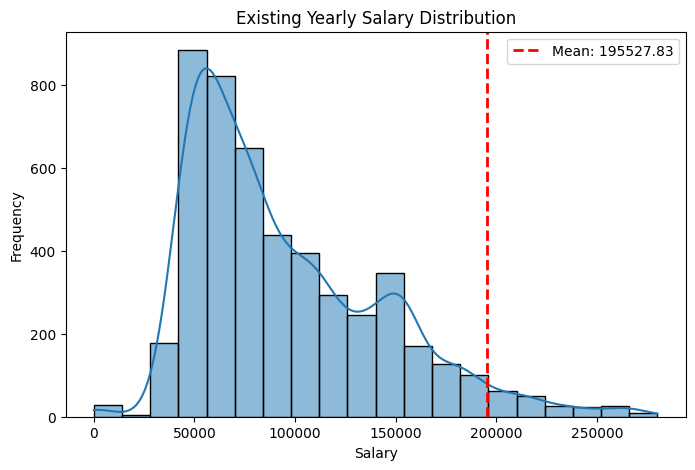

In [17]:
salary_clean = df['Salary ($)'].dropna()

salary_mean = salary_clean.mean()
upper = np.percentile(salary_clean, 99)  # optional, for outlier control

plt.figure(figsize=(8,5))
sns.histplot(salary_clean[salary_clean <= upper], bins=20, kde=True)
plt.axvline(salary_mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {salary_mean:.2f}")
plt.title("Existing Yearly Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Pictures/salary_distribution.png", dpi=300, bbox_inches="tight")  
plt.show()

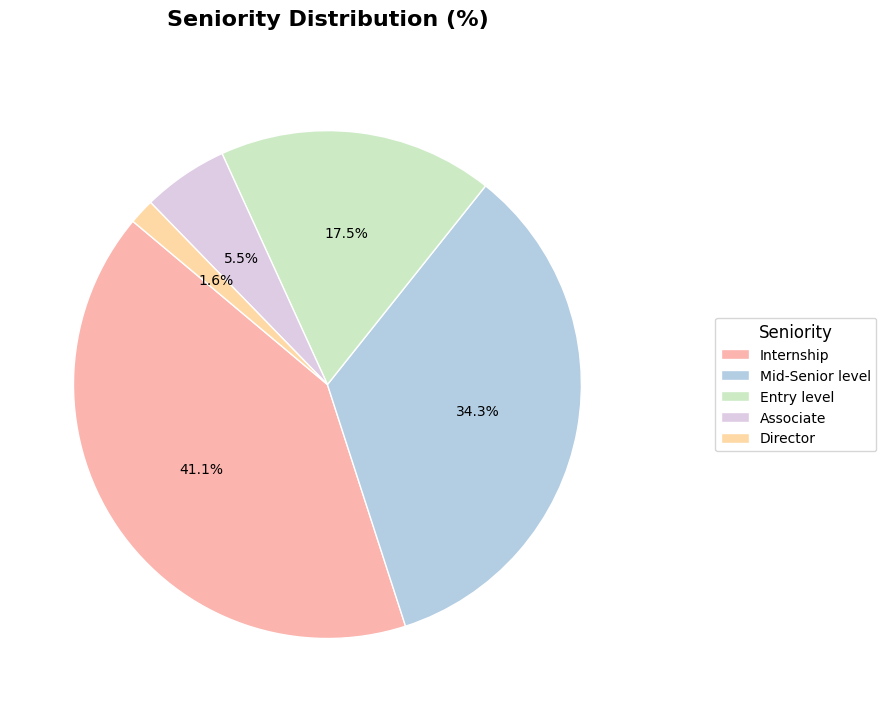

In [39]:
import matplotlib.pyplot as plt
import numpy as np

seniority_counts = df['Seniority level'].value_counts()
seniority_counts = seniority_counts[seniority_counts.index != "Unknown"]

# --- Remove categories < 1% ---
total = seniority_counts.sum()
seniority_counts = seniority_counts[seniority_counts / total >= 0.01]

# --- Prepare data ---
labels = seniority_counts.index
sizes = seniority_counts.values
colors = plt.cm.Pastel1.colors

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,             # we'll handle legend separately
    autopct='%1.1f%%',       # display percentage directly on slice
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='white'),
    textprops=dict(color='black', fontsize=10),
    radius=1.0
)

# --- Legend ---
ax.legend(
    wedges,
    labels,
    title="Seniority",
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),
    fontsize=10,
    title_fontsize=12
)

# --- Title ---
ax.set_title("Seniority Distribution (%)", fontsize=16, fontweight="bold", pad=30)

# --- Save and show ---
plt.savefig("Pictures/seniority_distribution.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

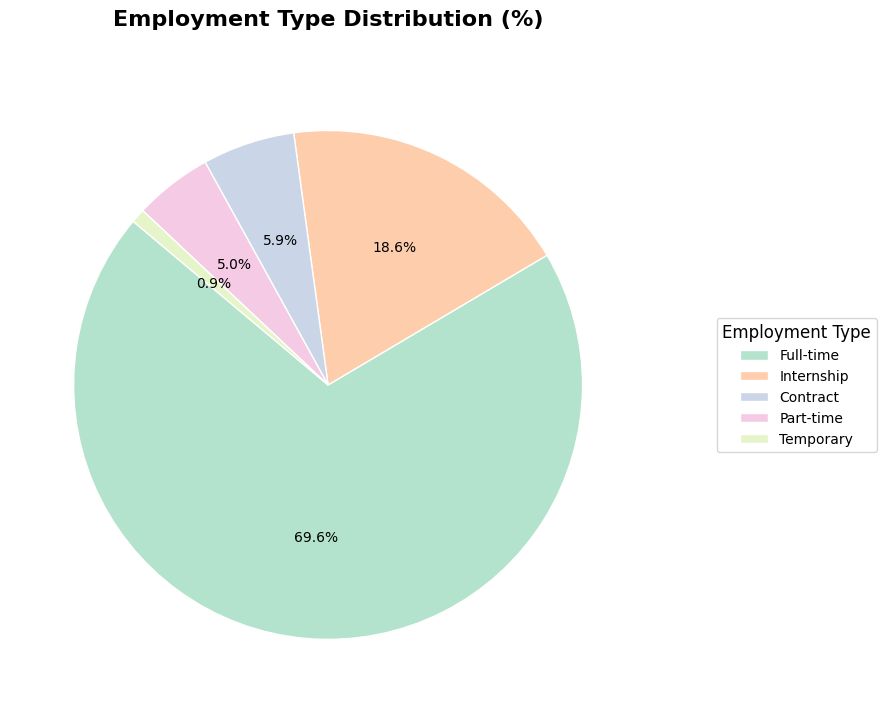

In [38]:
# --- Compute counts and drop "Unknown" ---
employment_counts = df['Employment type'].value_counts()
employment_counts = employment_counts[employment_counts.index != "Unknown"]

# --- Remove categories < 0.8% ---
total = employment_counts.sum()
employment_counts = employment_counts[employment_counts / total >= 0.008]

# --- Prepare data ---
labels = employment_counts.index
sizes = employment_counts.values
colors = plt.cm.Pastel2.colors

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='white'),
    textprops=dict(color='black', fontsize=10),
    radius=1.0
)

# --- Legend ---
ax.legend(
    wedges,
    labels,
    title="Employment Type",
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),
    fontsize=10,
    title_fontsize=12
)

# --- Title & Save ---
ax.set_title("Employment Type Distribution (%)", fontsize=16, fontweight="bold", pad=30)

plt.savefig("Pictures/employment_type_distribution.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

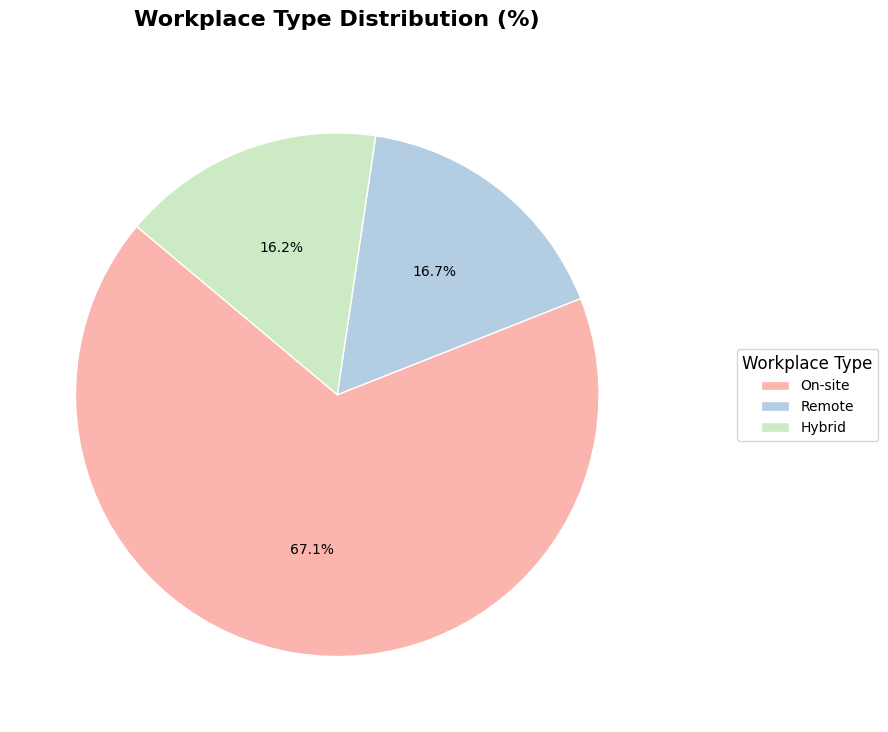

In [42]:
workplace_counts = df['workplace_type'].value_counts(dropna=False)

# Remove "Unknown" and NaN
workplace_counts = workplace_counts[
    (workplace_counts.index != "Unknown") & 
    (workplace_counts.index.notna())
]

# --- Remove categories < 1% ---
total = workplace_counts.sum()
workplace_counts = workplace_counts[workplace_counts / total >= 0.01]

# --- Prepare data ---
labels = workplace_counts.index
sizes = workplace_counts.values
colors = plt.cm.Pastel1.colors  # same theme as previous charts

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='white'),
    textprops=dict(color='black', fontsize=10),
    radius=1.0
)

# --- Legend ---
ax.legend(
    wedges,
    labels,
    title="Workplace Type",
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),
    fontsize=10,
    title_fontsize=12
)

# --- Title & Save ---
ax.set_title("Workplace Type Distribution (%)", fontsize=16, fontweight="bold", pad=30)
plt.savefig("Pictures/workplace_type_distribution.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [58]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

# --- 1️⃣ Rule-based pre-normalization ---
def normalize_direction(text):
    """Fix obvious reversed two-word patterns before semantic clustering."""
    if pd.isna(text):
        return None
    text = text.lower().strip()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    if len(text.split()) == 2:  # for two-word phrases, fix swapped order
        a, b = text.split()
        if (b + " " + a) in ["information technology", "technology management",
                             "project management", "business development",
                             "data science", "human resources"]:
            return b + " " + a
    return text

df["Job function (normalized)"] = df["Job function"].apply(normalize_direction)

# --- 2️⃣ Semantic clustering with token-based logic ---
def cluster_semantic_terms(series, threshold=0.8):
    phrases = [p.strip().lower() for p in series.dropna().unique() if len(p.strip()) > 1]
    embeddings = model.encode(phrases, normalize_embeddings=True)
    mapping = {}
    used = set()

    for i, phrase in enumerate(phrases):
    # for each phrase, if it's already in used set, skip
        if phrase in used:
            continue
        cluster = [phrase]
        used.add(phrase)

        # Check similarity + token overlap
        sims = util.cos_sim(embeddings[i], embeddings)[0].numpy()
        for j, sim in enumerate(sims):
            if j != i and sim >= threshold:
                if phrases[j] not in used:
                    # extra rule: must share at least one word token
                    if len(set(phrases[i].split()) & set(phrases[j].split())) > 0:
                        cluster.append(phrases[j])
                        used.add(phrases[j])

        # canonical term: prefer one containing the most common phrase pattern
        canonical = sorted(cluster, key=lambda x: (-sum(c in x for c in ["info", "tech", "data", "manage", "project", "business"]), len(x)))[0]
        for c in cluster:
            mapping[c] = canonical

    return mapping

# --- Apply clustering ---
mapping = cluster_semantic_terms(df["Job function (normalized)"], threshold=0.8)
df["Job function (semantic)"] = df["Job function (normalized)"].replace(mapping)

# --- Remove empty or generic ---
generic = {"engineering", "management", "business", "consulting", "technology", "sales", "general"}
df["Job function (semantic)"] = df["Job function (semantic)"].apply(
    lambda x: None if pd.isna(x) or x in generic else x
)

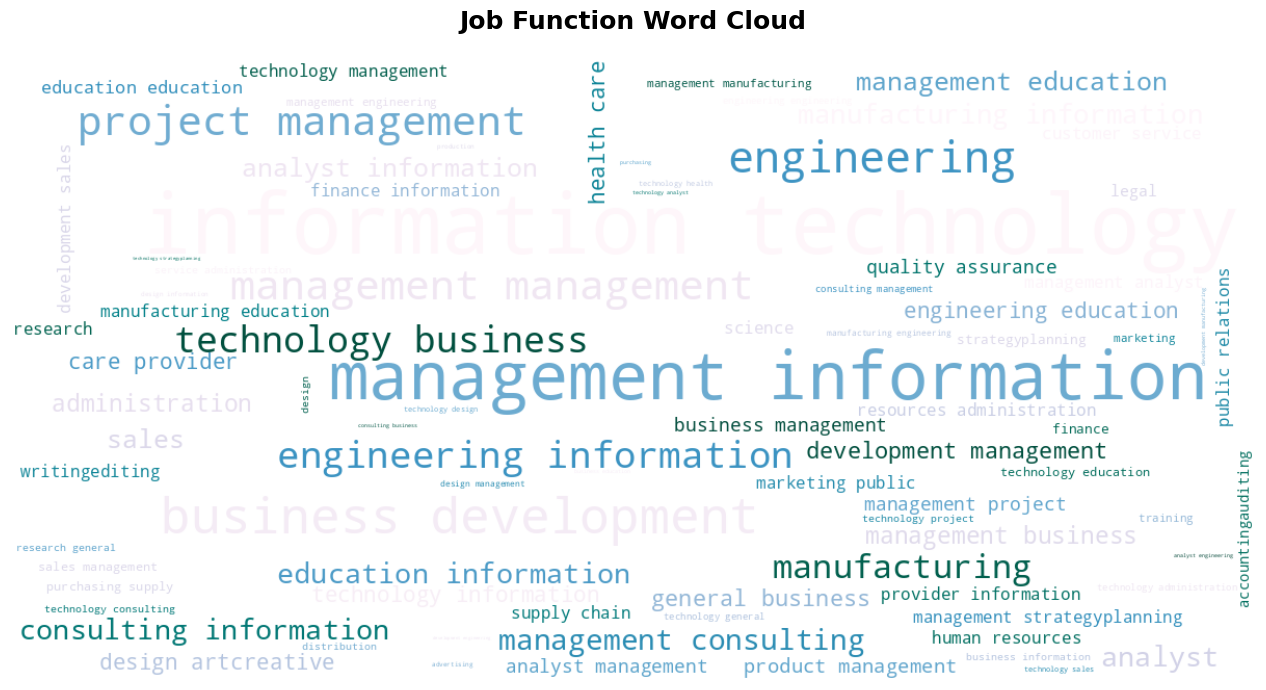

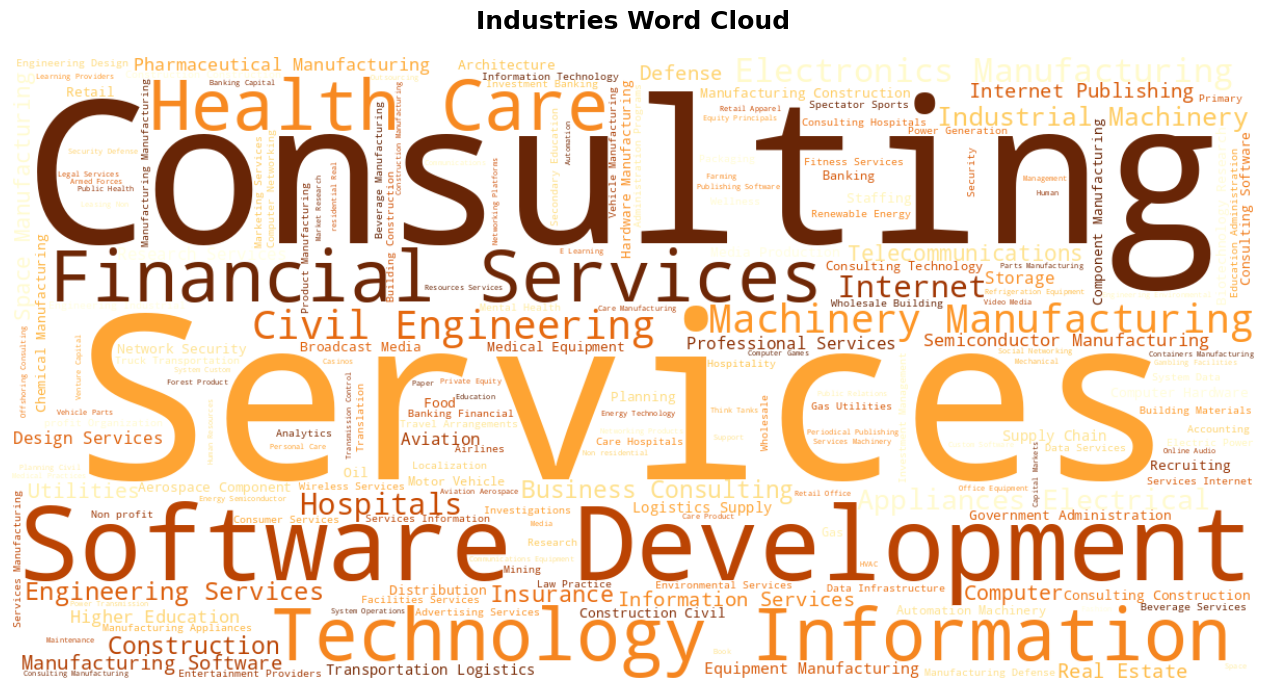

In [59]:
from wordcloud import WordCloud

def plot_wordcloud(text, title, filename, colormap="coolwarm"):
    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        colormap=colormap,        # soft, readable gradient
        max_words=200,            # limit clutter
        contour_color="lightgray",
        contour_width=1.5,
        prefer_horizontal=0.9,
        relative_scaling=0.4,
        font_path=None            # uses default, or you can specify a nicer font
    ).generate(text)

    plt.figure(figsize=(14, 7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=18, fontweight="bold", pad=20)
    plt.tight_layout()
    plt.savefig(f"Pictures/{filename}.png", dpi=300, bbox_inches="tight")
    plt.show()


text_func = " ".join(df['Job function (semantic)'].dropna().astype(str))
plot_wordcloud(text_func, "Job Function Word Cloud", "job_function_wordcloud", colormap="PuBuGn")

# --- WordCloud for Industries ---
text_ind = " ".join(df["Industries"].dropna().astype(str))
plot_wordcloud(text_ind, "Industries Word Cloud", "industries_wordcloud", colormap="YlOrBr")

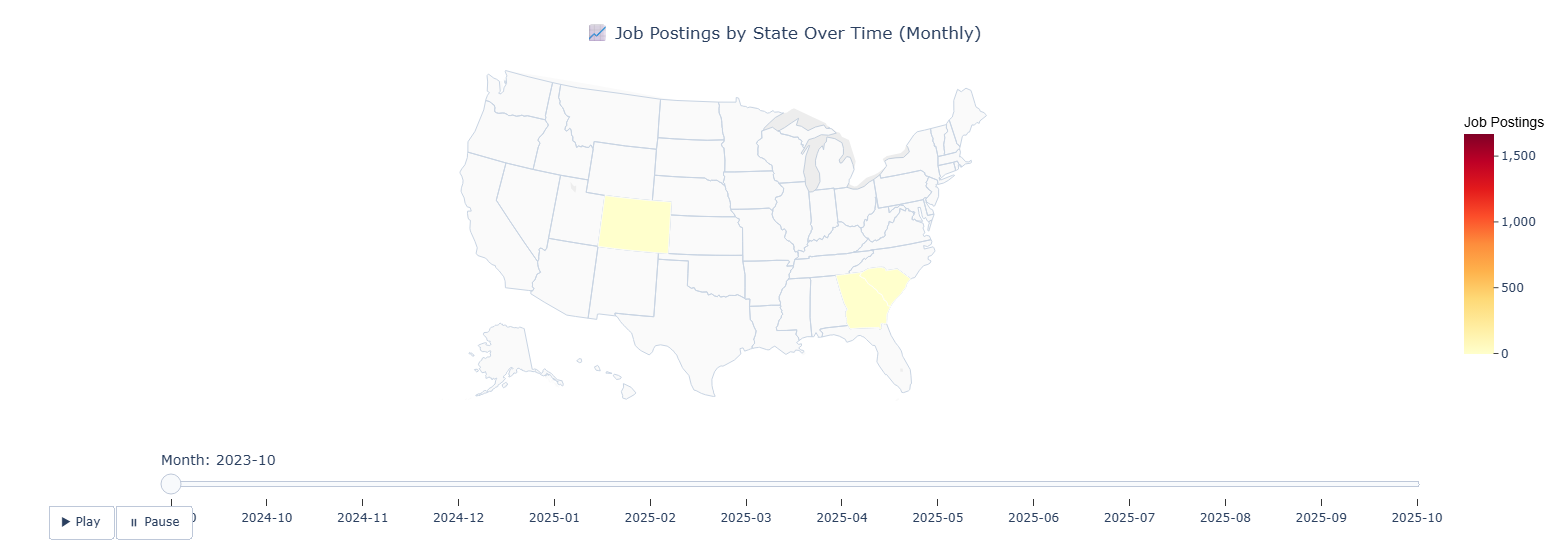

In [65]:
import plotly.express as px
from datetime import datetime

df["publish_date"] = pd.to_datetime(df["publish_date"], errors="coerce")

current_month = pd.Period(datetime.now().strftime("%Y-%m"), freq="M")
df.loc[df["publish_date"].isna(), "publish_date"] = current_month.to_timestamp()

df["month"] = df["publish_date"].dt.to_period("M").astype(str)

job_counts = (
    df.dropna(subset=["State"])
      .groupby(["month", "State"])
      .size()
      .reset_index(name="job_count")
      .sort_values(["month", "State"])
)

vmin = 0
vmax = np.nanmax(job_counts["job_count"].values)

fig = px.choropleth(
    job_counts,
    locations="State",           # must be 2-letter abbreviations
    locationmode="USA-states",
    color="job_count",
    hover_name="State",
    animation_frame="month",
    range_color=(vmin, vmax),
    color_continuous_scale="YlOrRd",
    labels={"job_count": "Job Postings"},
    scope="usa"
)

fig.update_traces(
    marker_line_color="white",
    marker_line_width=0.8,
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Month: %{animation_group}<br>" +
                  "Jobs: %{z:,}<extra></extra>"
)

fig.update_layout(
    title={
        "text": "📈 Job Postings by State Over Time (Monthly)",
        "x": 0.5,
        "xanchor": "center",
        "y": 0.95
    },
    template="plotly_white",
    geo=dict(
        scope="usa",
        showlakes=True, lakecolor="rgba(0,0,0,0.05)",
        showcountries=False,
        showland=True, landcolor="rgba(0,0,0,0.02)"
    ),
    coloraxis_colorbar=dict(
        title=dict(text="Job Postings", font=dict(size=14, family="Arial", color="black")),
        ticks="outside",
        tickformat=",",
        lenmode="fraction",
        len=0.75
    ),
    updatemenus=[{
        "type": "buttons",
        "showactive": False,
        "buttons": [
            {
                "label": "▶ Play",
                "method": "animate",
                "args": [None, {"frame": {"duration": 700, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 300}}]
            },
            {
                "label": "⏸ Pause",
                "method": "animate",
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}]
            }
        ],
        "x": 0.02, "y": -0.08, "xanchor": "left", "yanchor": "top"
    }],
    sliders=[{
        "pad": {"t": 40},
        "currentvalue": {"prefix": "Month: ", "font": {"size": 14}},
        "len": 0.9
    }],
    width=1000,
    height=550,
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.layout.sliders[0].steps = sorted(fig.layout.sliders[0].steps, key=lambda s: s["label"])

fig.show()

In [66]:
fig.write_html("Pictures/job_postings_choropleth.html")

In [69]:
df.to_csv("linkedin_jobs_for_visualization.csv", index = False)